Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 922,753 (3.52 MB)

 Trainable params: 922,753 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.4292 - loss: 0.8642 - val_accuracy: 0.1000 - val_loss: 411.0208
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - accuracy: 0.5135 - loss: 0.6948 - val_accuracy: 0.1000 - val_loss: 103.5348
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.5434 - loss: 0.6892 - val_accuracy: 0.1036 - val_loss: -8.0249
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.6632 - loss: 0.6808 - val_accuracy: 0.0982 - val_loss: 7.3269
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - accuracy: 0.6368 - loss: 0.6755 - val_accuracy: 0.0983 - val_loss: 57.7917
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.6622 - loss: 0.6578 - val_accuracy: 0.0907 - val_loss: 24.0992
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.7145 - loss: 0.6391 - val_accuracy: 0.0900 - val_loss: -93.5087
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.7217 - loss: 0.6181 - val_accuracy: 0.0894 - 

C:\Users\nikhi\AppData\Local\Temp\ipykernel_27024\335277607.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])  # Convert y_train[i] to integer before indexing class_names


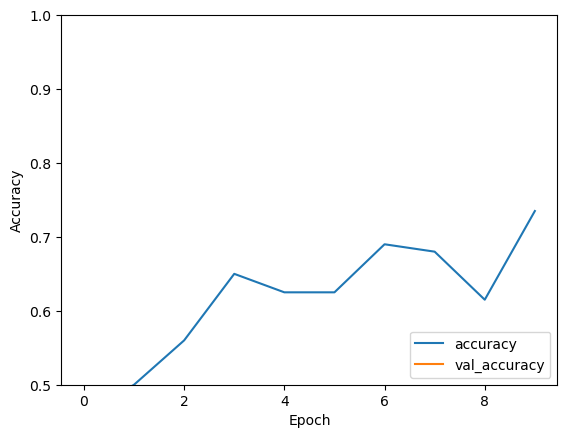

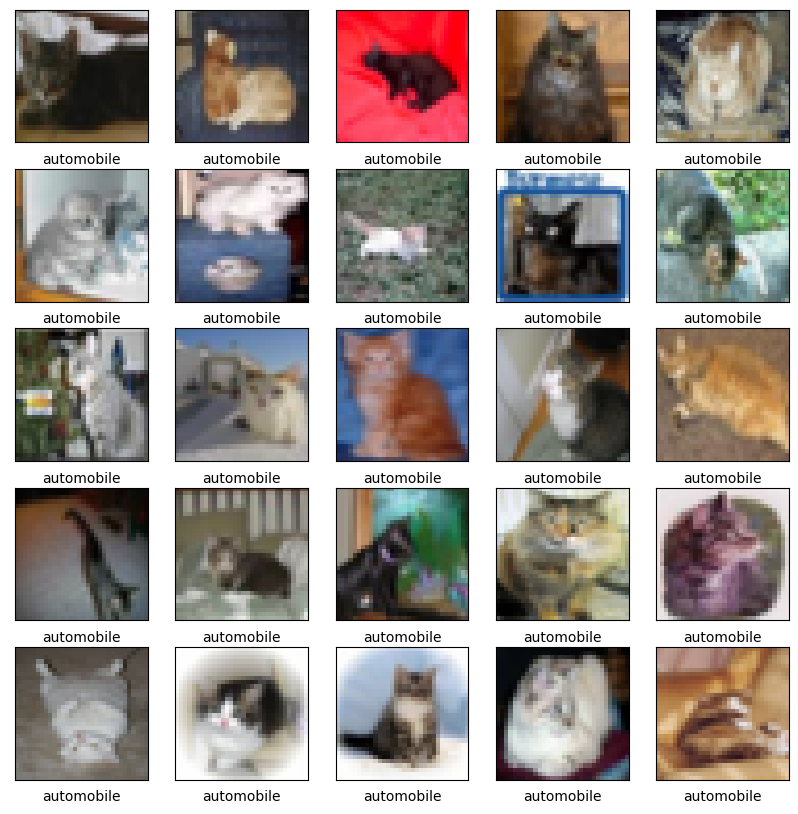

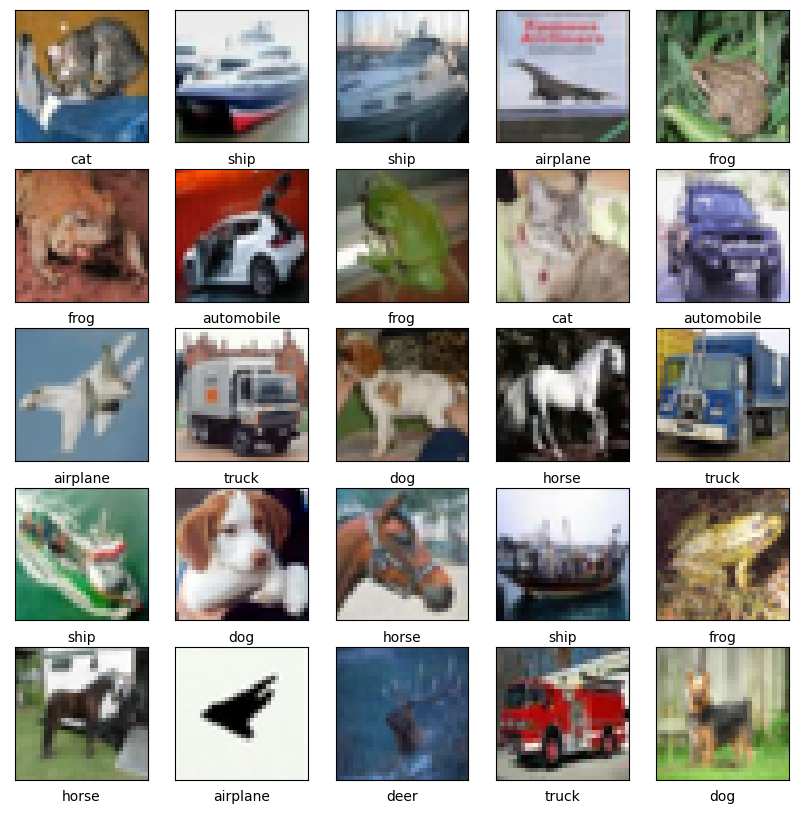

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Selecting cat and dog images
cat_indices = np.where(train_labels == 3)[0][:100]
dog_indices = np.where(train_labels == 5)[0][:100]
selected_indices = np.concatenate((cat_indices, dog_indices))

# Extracting selected images and labels
X_train = train_images[selected_indices] / 255.0
y_train = train_labels[selected_indices]
y_train = np.where(y_train == 3, 1, 0)  # 1 for cat, 0 for dog

# Model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(test_images, test_labels))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Displaying sample images with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Displaying sample images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])  # Convert y_train[i] to integer before indexing class_names
plt.show()


# Displaying test images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [2]:
!pip install tensorflow

^C


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [9]:
X_train

array([[[[0.49019608, 0.49019608, 0.45490196],
         [0.43137255, 0.39607843, 0.35686275],
         [0.4       , 0.35294118, 0.3254902 ],
         ...,
         [0.79215686, 0.81176471, 0.83921569],
         [0.78431373, 0.80392157, 0.83137255],
         [0.79215686, 0.81568627, 0.83921569]],

        [[0.55686275, 0.57254902, 0.55686275],
         [0.57254902, 0.56470588, 0.54509804],
         [0.69019608, 0.6745098 , 0.66666667],
         ...,
         [0.76470588, 0.78823529, 0.80392157],
         [0.77647059, 0.80392157, 0.81960784],
         [0.8       , 0.82745098, 0.84313725]],

        [[0.70588235, 0.7254902 , 0.71764706],
         [0.56078431, 0.57254902, 0.57254902],
         [0.61176471, 0.61568627, 0.61568627],
         ...,
         [0.47843137, 0.43529412, 0.44313725],
         [0.54509804, 0.50196078, 0.51372549],
         [0.61960784, 0.57647059, 0.58823529]],

        ...,

        [[0.40784314, 0.32156863, 0.16078431],
         [0.39607843, 0.31372549, 0.15294118]

In [ ]:
# Importing Libraries:
# TensorFlow and its submodules (datasets, layers, models) are imported to build and train the neural network.
# matplotlib.pyplot is imported for plotting images and accuracy curves.
# numpy is imported for numerical operations.
# Loading CIFAR-10 Dataset:
# The CIFAR-10 dataset is loaded using datasets.cifar10.load_data(). It contains 60,000 color images in 10 classes, with 6,000 images per class.
# Selecting Cat and Dog Images:
# Cat and dog images are selected from the training set. Only the first 100 images of each class are chosen.
# The indices of cat and dog images are obtained using NumPy's where function.
# Selected indices are concatenated to form the final selection.
# Preprocessing:
# Selected images are normalized to the range [0, 1] by dividing by 255.0.
# Labels for cat images are set to 1, and labels for dog images are set to 0.
# Model Architecture:
# The neural network model is defined using the Sequential API.
# It consists of a convolutional layer (Conv2D), a max-pooling layer (MaxPooling2D), a flattening layer (Flatten), and two dense layers (Dense).
# ReLU activation function is used for all layers except the output layer, which uses sigmoid activation for binary classification.
# Model Compilation:
# The model is compiled with the Adam optimizer and binary cross-entropy loss function.
# Accuracy is chosen as the evaluation metric.
# Model Training:
# The model is trained using the fit method with the training data (X_train and y_train) for 10 epochs.
# Validation data (test_images and test_labels) are provided for validation during training.
# Plotting Accuracy:
# Training and validation accuracy are plotted over epochs using Matplotlib.
# Model Evaluation:
# Test images and labels are used to evaluate the trained model using the evaluate method.
# Test accuracy is printed.
# Displaying Sample Images:
# A grid of sample training images along with their corresponding labels (cat or dog) is displayed using Matplotlib.
# Displaying Test Images with Predicted Labels:
# A grid of sample test images along with their predicted labels (predicted class names) is displayed using Matplotlib.
# Overall, this code demonstrates how to build, train, evaluate, and visualize the performance of a convolutional neural network for classifying cat and dog images from the CIFAR-10 dataset.